# Base Notebook

## Libraries

In [1]:
from collections import Counter
import datetime
from pathlib import Path
import random

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from ipywidgets import Button
from IPython.display import display
from IPython.display import FileLink

## Global variables

In [5]:
BASE_DIR = Path(".").resolve().parent.parent

In [6]:
IMAGES_DIR = BASE_DIR / "docs" / "images"

## Functions

In [7]:
def get_random_color(only_light_color: bool = False) -> str:
    if only_light_color:
        r = random.randint(200, 255)
        g = random.randint(200, 255)
        b = random.randint(200, 255)
        color_hex = f"#{r:02x}{g:02x}{b:02x}"    
    else:
        value = random.randint(0, 0xFFFFFF)
        color_hex = f"#{value:06x}"

    return color_hex

In [8]:
def get_random_colors(colors_number: int, only_light_color: bool = False) -> list[str]:
    random_colors = []

    for color_number in range(1, colors_number + 1):
        while True:
            random_color = get_random_color(only_light_color=only_light_color)
            if random_color not in random_colors:
                break

        random_colors.append(random_color)

    return random_colors

In [9]:
def generate_filename(base_name: str = "output", extension: str = "png", with_dt: bool = True) -> str:
    now = datetime.datetime.now()
    fmt = "%Y%m%d%H%M%S"
    dt = now.strftime(fmt)

    if with_dt:
        return f"{base_name}_{dt}.{extension}"
    
    return f"{base_name}.{extension}"

In [10]:
def save_plot(plt_obj, base_name: str = "output", with_dt: bool = False, overwrite: bool = True):
    filename = generate_filename(base_name=base_name, extension="png", with_dt=with_dt)
    path = IMAGES_DIR / filename

    if path.exists() and not overwrite:
        return
    
    plt_obj.savefig(path.as_posix(), bbox_inches="tight")

## Random Sample 1

In [11]:
content = """
Satisfecho
Muy Satisfecho
Descontento
Medianamente Satisfecho
Satisfecho
Satisfecho
Medianamente Satisfecho
Satisfecho
Muy Satisfecho
Muy Satisfecho
Muy Satisfecho
Descontento
Descontento
Medianamente Satisfecho
Satisfecho
Satisfecho
Satisfecho
Muy Satisfecho
Satisfecho
Muy Satisfecho
Muy Satisfecho
Medianamente Satisfecho
Satisfecho
Medianamente Satisfecho
Satisfecho
"""

In [12]:
content_list = content.split("\n")

In [13]:
content_list

['',
 'Satisfecho',
 'Muy Satisfecho',
 'Descontento',
 'Medianamente Satisfecho',
 'Satisfecho',
 'Satisfecho',
 'Medianamente Satisfecho',
 'Satisfecho',
 'Muy Satisfecho',
 'Muy Satisfecho',
 'Muy Satisfecho',
 'Descontento',
 'Descontento',
 'Medianamente Satisfecho',
 'Satisfecho',
 'Satisfecho',
 'Satisfecho',
 'Muy Satisfecho',
 'Satisfecho',
 'Muy Satisfecho',
 'Muy Satisfecho',
 'Medianamente Satisfecho',
 'Satisfecho',
 'Medianamente Satisfecho',
 'Satisfecho',
 '']

In [14]:
content_list = list(filter(lambda element: element != "", content_list))

In [15]:
content_list

['Satisfecho',
 'Muy Satisfecho',
 'Descontento',
 'Medianamente Satisfecho',
 'Satisfecho',
 'Satisfecho',
 'Medianamente Satisfecho',
 'Satisfecho',
 'Muy Satisfecho',
 'Muy Satisfecho',
 'Muy Satisfecho',
 'Descontento',
 'Descontento',
 'Medianamente Satisfecho',
 'Satisfecho',
 'Satisfecho',
 'Satisfecho',
 'Muy Satisfecho',
 'Satisfecho',
 'Muy Satisfecho',
 'Muy Satisfecho',
 'Medianamente Satisfecho',
 'Satisfecho',
 'Medianamente Satisfecho',
 'Satisfecho']

In [16]:
frequencies = Counter(content_list)

In [17]:
frequencies

Counter({'Satisfecho': 10,
         'Muy Satisfecho': 7,
         'Medianamente Satisfecho': 5,
         'Descontento': 3})

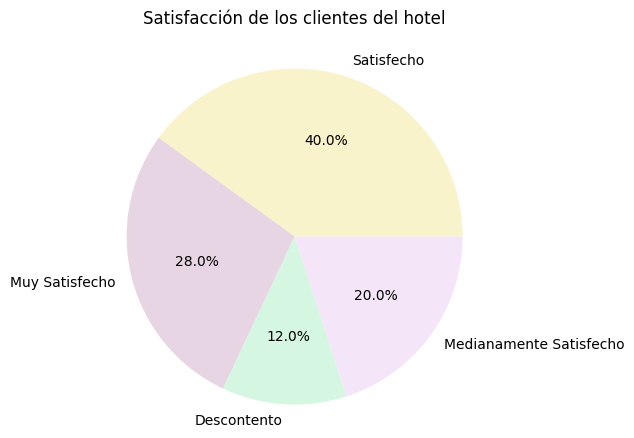

In [18]:
labels = list(frequencies.keys())
sizes = list(frequencies.values())
colors = get_random_colors(len(labels), only_light_color=True)

plt.title("Satisfacción de los clientes del hotel", pad=20)

plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    colors=colors,
)

plt.axis('equal')
save_plot(plt_obj=plt, base_name="satisfaccion_clientes_hotel", with_dt=False, overwrite=False)
plt.show()

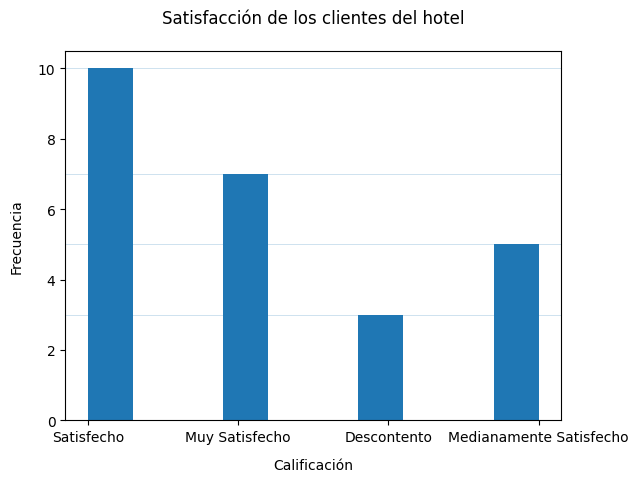

In [22]:
sizes = list(frequencies.values())

plt.title("Satisfacción de los clientes del hotel", pad=20)
plt.hist(content_list)
plt.xlabel("Calificación", labelpad=10)
plt.ylabel("Frecuencia", labelpad=10)

for size in sizes:
    plt.axhline(y=size, linestyle="-", linewidth=0.5, alpha=0.3)

plt.xticks()

save_plot(plt_obj=plt, base_name="satisfaccion_clientes_hotel_hist", with_dt=False, overwrite=True)
plt.show()